In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from tokenize_dataset import tokenize_dataset
from PeakCluster import PeakCluster
from collections import Counter

In [2]:
df = pd.read_csv("/content/Clinical and Other Features (edited).csv", low_memory=False)

In [3]:
df.head()

,Patient ID,Days to MRI (From the Date of Diagnosis),Manufacturer,Manufacturer Model Name,Scan Options,Field Strength (Tesla),Patient Position During MRI,TR (Repetition Time),TE (Echo Time),Acquisition Matrix,Slice Thickness,Rows,Columns,Flip Angle \r\n,FOV Computed (Field of View) in cm,Date of Birth (Days),Menopause (at diagnosis),Race and Ethnicity,Metastatic at Presentation (Outside of Lymph Nodes),ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],Staging(Nodes)#(Nx replaced by -1)[N],Staging(Metastasis)#(Mx -replaced by -1)[M],Tumor Grade,Position,Bilateral Information,For Other Side If Bilateral,Multicentric/Multifocal,Contralateral Breast Involvement,Lymphadenopathy or Suspicious Nodes,Skin/Nipple Invovlement,Pec/Chest Involvement,Surgery,Days to Surgery (from the date of diagnosis),Definitive Surgery Type,"Clinical Response, Evaluated Through Imaging",Pathologic Response to Neoadjuvant Therapy,Days to local recurrence (from the date of diagnosis),Days to distant recurrence(from the date of diagnosis),Days to death (from the date of diagnosis),Days to last local recurrence free assessment (from the date of diagnosis),Days to last distant recurrence free assemssment(from the date of diagnosis),Age at mammo (days),Breast Density,Shape,Margin,Architectural distortion,Mass Density,Calcifications,Tumor Size (cm),Shape.1,Margin.1,Tumor Size (cm).1,Echogenicity,Solid,Posterior acoustic shadowing,Neoadjuvant Chemotherapy,Adjuvant Chemotherapy,Neoadjuvant Endocrine Therapy Medications,Adjuvant Endocrine Therapy Medications,Known Ovarian Status,Number of Ovaries In Situ \r\n,Therapeutic or Prophylactic Oophorectomy as part of Endocrine Therapy,Neoadjuvant Anti-Her2 Neu Therapy,Adjuvant Anti-Her2 Neu Therapy,Received Neoadjuvant Therapy or Not,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
0,1,6,2,0,5,1,0,4.120,1.360,9,5,1,1,3,15,15209,0,2,0,0,0,1,2,NaN,2.0,1.0,0,3.0,L 9 medial,0,NP,0,0,0,0,0,1.0,257,0,2.0,2.0,NP,NP,NP,2940,2940,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,1.0,0.0,0.0,0.0,1,0,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,2,12,0,4,1,3,0,6.918,2.704,5,12,2,2,2,5,14061,0,2,0,0,0,0,3,NaN,2.0,0.0,0,3.0,L 1,0,NP,0,0,0,0,0,1.0,192,0,1.0,3.0,NP,NP,NP,1649,1649,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,1.0,0.0,0.0,0.0,0,NP,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,3,10,0,3,2,3,0,5.527,2.416,2,18,2,2,2,14,22685,1,1,0,1,1,0,0,8.0,2.0,1.0,0,3.0,L 2,NC,NC,1,0,1,0,0,1.0,168,1,2.0,2.0,NP,NP,NP,1697,1697,-4,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0,NP,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,4,18,0,4,1,1,0,4.856,2.260,1,18,2,2,2,15,21479,1,1,0,1,1,0,0,14.0,1.0,0.0,0,3.0,L,0,NP,0,0,0,0,0,1.0,29,0,NaN,NaN,NP,NP,NP,1990,1990,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,0.0,0.0,0.0,1.0,0,NP,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,12,2,0,5,1,1,4.270,1.340,9,18,1,1,2,14,13932,0,5,0,1,0,1,1,NaN,2.0,1.0,0,3.0,R 3,0,NP,1,0,1,0,0,1.0,159,1,1.0,1.0,NP,NP,NP,1845,1845,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,NC,1.0,0.0,0.0,1.0,0,NP,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0


In [4]:
column_means = df.mean()
df = df.fillna(column_means)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [5]:
df = tokenize_dataset(df)

In [6]:
# normalize df
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

3


KNeighborsClassifier(n_neighbors=3)

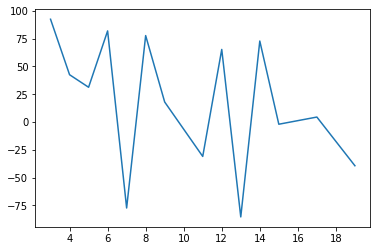

<Figure size 432x288 with 0 Axes>

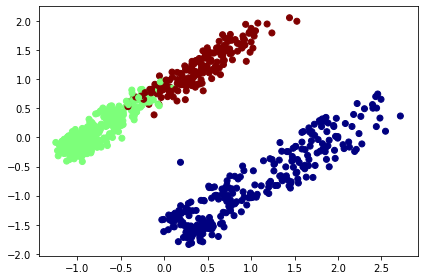

In [7]:
model = PeakCluster(data)
label_counts = dict(Counter(model.labels_))

n_clusters = len(list(set(model.labels_)))

neigh = KNeighborsClassifier(n_neighbors=n_clusters)
neigh.fit(data, model.labels_)